In [1]:
import pandas as pd

In [2]:
data={
    'StudyHours':[1,2,3,4,5,6,7,8],
    'SleepHours':[4,5,6,5,7,6,8,7],
    'Pass':[0,0,0,1,1,1,1,1]
}
df=pd.DataFrame(data)

In [3]:
df

,StudyHours,SleepHours,Pass
0,1,4,0
1,2,5,0
2,3,6,0
3,4,5,1
4,5,7,1
5,6,6,1
6,7,8,1
7,8,7,1


In [5]:
df.head(3)

,StudyHours,SleepHours,Pass
0,1,4,0
1,2,5,0
2,3,6,0


In [4]:
#features & Target separate
X=df[['StudyHours','SleepHours']] #2D tensor (matrix)
y=df['Pass'] #1D tensor (vector)

In [6]:
#train test split
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0)

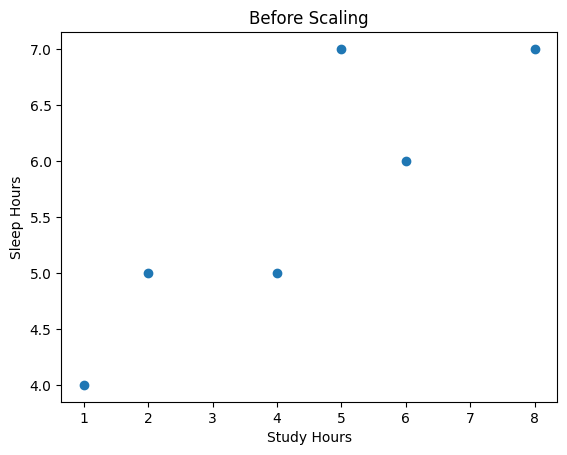

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_train['StudyHours'], X_train['SleepHours'])
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Before Scaling")
plt.show()

In [9]:
#standardization
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

X_train_scaled


,StudyHours,SleepHours
0,-0.989949,-0.603023
1,1.555635,1.206045
2,-0.141421,-0.603023
3,-1.414214,-1.507557
4,0.707107,0.301511
5,0.282843,1.206045


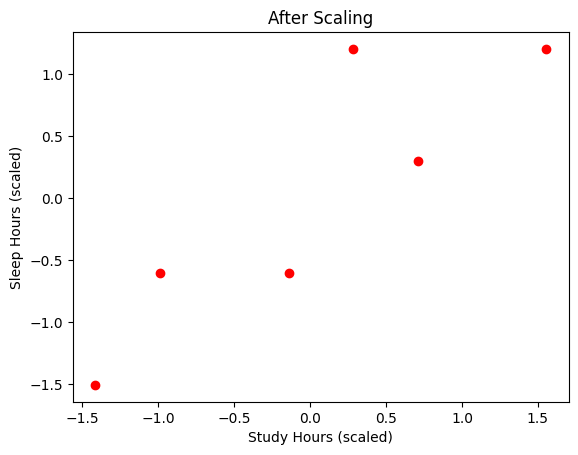

In [14]:
plt.scatter(
    X_train_scaled['StudyHours'],
    X_train_scaled['SleepHours'],
    color='red'
)
plt.xlabel("Study Hours (scaled)")
plt.ylabel("Sleep Hours (scaled)")
plt.title("After Scaling")
plt.show()

Model WITHOUT scaling

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
y_pred

array([1, 1])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test, y_pred)

0.5

Model WITH scaling

In [22]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = lr_scaled.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5

In [23]:
import numpy as np

# tensor examples
scalar = np.array(5)
vector = np.array([1,2,3])
matrix = np.array([[1,2],[3,4]])

In [24]:
scalar.shape, vector.shape, matrix.shape

((), (3,), (2, 2))